 # Theis (1935) interpretation  
 
 This notebook demonstrates how to use **hypy** for the interpretation of a pumping test with the Theis (1935) solution.

 Copyright 1998-2017 - Philippe Renard & Co.



 ## Load the data
 The data set for this example has been typed from: 
 Table 5.1, page 172 in the following book:
 C.W. Fetter, 2001, Applied Hydrogeology, Fourth Edition.
 Prentice Hall, Upper Saddle River, 598 pp.

 Before starting, you have to import **hypy**. We do it with the command `import hypy as hp`


In [22]:
import hypy as hp

For this example, the data is stored in the ascii file `ths_ds1.txt` that contains two columns as we can see if you edit the data file with your prefered text editor. The first column is the time in seconds. The second column contains the drawdown in meters.

It is also possible to import data from complex files but we will not discuss this point here.

Let us now load the data in the python workspace with the ldf function from hytool. This allows to create two vectors: t and s containing the data. We will use them in the next steps, but we can first plot them to check graphicaly that they have been correctly loaded.


In [19]:
t,s = hp.ldf('ths_ds1.txt')

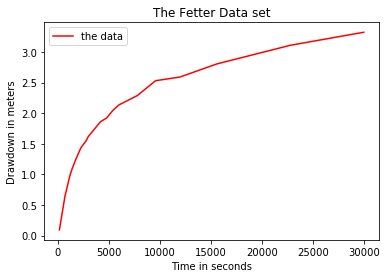

In [23]:
hp.plot(t,s)

 ## Diagnostic plot 
 
 In order to display the diagnostic plot of the data, we use the function diagnostic(t,s) provided by hypy.

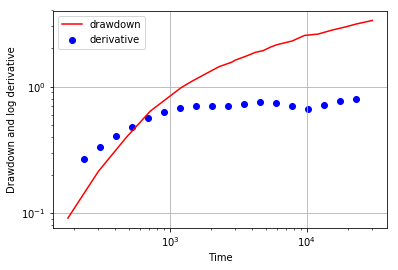

In [24]:
hp.diagnostic(t,s)

The plot shows a typical 2D infinite acting radial flow.
The derivative stabilizes at late time and the derivative is larger than
the drawdown at early time. 

We will therefore interpret the data with the Theis (1935) solution
that allows to model such behaviour
 
Hytool syntax : 
The syntax of hytool uses some basic convention that needs to be
explained. Most of the functions have names that are made with a suffix
and a prefix. Between the suffix and the prefix, you have to use a point. The function also needs to start with "hp.".   
 
 

The prefix is a set of three letters that represent a
certain model. For example, for the Theis (1935) model we use the letters
ths. For the Papadopulos Cooper (1967) model for large diameter well, we
use pcw.

The suffix indicates what the function does. For example, the action can
be: guess the values of the parameters, in that case the suffix will be gss. If the
action is report the results of an interpretation the suffix will be rpt.

With that convention we will have functions such as hp.ths.gss, hp.ths.rpt,
hp.pcw.gss, etc.


Along this tutorial, you will discover some functions that are applied to
the Theis (1935) model. Try to remember the names of the suffix, they are general
and will be applicable to other models.

Model parameter guess :
In order to determine the value of the Theis model parameter, we first 
use the function ths_gss(t,s) to estimate roughly an initial guess p0.

For the Theis (1935) model, the parameter vector contains two values: the
first is the slope a of the late time straight line, while the
second parameter is the time t0 at which this straight line
intercept the axis s=0.

In [29]:
p0 = hp.ths.gss(t,s)

AttributeError: module 'hypy' has no attribute 'ths'

To check visually the quality of this first guess, we then plot the model
corresponding to these parameters and the data with the hytool function
trial. The function trial can be applied for any model and therefore it
requires that the name of model 'ths' is provided together with the values of
the parameter p0 and the data. 'ths' is the name of the function that
computes the drawdown from p0 and t.

We see in the resulting figure both in log-log and semi-log scale
that the fit is already pretty good for this example.

In [28]:
hp.trial(p0,t,s, name = 'ths')

NameError: name 'p0' is not defined

Manual parameter adjustment
In this example, the initial guess provided by ths_gss is good. However, 
in practice it may happen that it does not provide a reliable result. One
can then change manually the values of the parameters and modify them
iteratively until he obtains a reasonable first fit.

Let us show the procedure.



We start with a first value of the parameters, and make the
plot. We see on the graph that the slope is too small and should be
increased. We need to modify it.

In [ ]:
p0 = [1.1,100]
hp.trial(p0,t,s,'ths')

Therefore we increase the slope to 1.8 and plot the result. 

The slope seems to be better but the straight line is shifted 
too much to the left. We must increase the value of t0 (the
time at which the straight intercept the horizontal axis) in the next
iteration.

In [ ]:
p0 = [1.8,100]
hp.trial(p0,t,s,'ths')

Let us change it to 500, and plot the results.
We obtain a rather good fit even if it is not perfect.

In [ ]:
p0 = [1.8,500]
hp.trial(p0,t,s,'ths')

Model parameter identification:

In the previous steps, we obtained a rough initial guess that is used here
as an initial value in an iterative non linear optimization technique to
fit the model to the complete data set. This is done with the hytool
function fit.

We see visually that the fit has been improved. The values of the
parameters have slightly changed.

In [ ]:
p = hp.fit(p0,t,s,'ths')
hp.trial(p,t,s,'ths')

Reporting the results :

The interpretation is finished. We need to report the results.
This is done with the function ths_rpt(p,t,s,d,title). 
The function needs the values of some additional data to compute the
Hydraulic parameters. For the Theis solution, we need the pumping rate q
and the radial distance r between the pumping well and the observation
well.

You can add your name and the title of your rapport in the call of the function. It's also possible to save it as an image with the filetype 'img' or as a pdf with the filetype 'pdf'. You can also change the title of your graph with ttle ='title of your graph'. it will automatically save the image or the pdf in the repertory you're currently working on under the name 'ths_rapport.filetype'


In [ ]:
q = 1.3888e-2 #pumping rate in m3/s
r = 250 #radial distance in m
d = [q,r]
hp.ths.rpt(p,t,s,d,'ths',Author='Your name',ttle = 'Interference test', Rapport = 'My rapport', filetype = 'pdf')

The estimated transmissivity is 1.4e-3 m2/s and the storativity is
2.1e-5. These numbers compare well with the values estimated by Fetter
(2001) which are the following:

Type curve matching (p.173):

T = 1.5 e-3 m2/s 

S = 2.4 e-5 
 
Straight line analysis (p. 174-175):

T = 1.5 e-3 m2/s 

S = 1.7 e-5

Summary:
 
Even if this demo was quite long because hytool offers the possibility to
act at many different levels during the process, the important thing to
remember is that the interpretation itself including loading the data and
producing the report, is done in 4 lines of code. Once this is done, the
user can edit the figure interactively and save it in a graphhical file.

In [ ]:
t,s = hp.ldf('/home/pianarol/AnacondaProjects/ths_ds1.txt')
p0 = hp.ths.gss(t,s)
p = hp.fit(p0,t,s, 'ths')
hp.ths.rpt(p,t,s,d,'ths','Theis interpretation of the Fetter data', Author='name', Rapport='rapport', filetype = 'pdf')